<a href="https://colab.research.google.com/github/kittikhun62/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'กิตติคุณ เกียรติศักดิ์ศิริ'
ID = '6230207600'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:26


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,5.416075,-2.888296,-9.690855,1.151488,6.831063,9.293195,-8.909361,9.443475,1.118379,-2.828672,0.668603,9.301132,2.385790,5.322632,-8.452852,-7.019485,-0.807720,-1.064149,4.107312,-2.104505,9.330283,-3.486679,-9.123284,3.891806,5.492582,-4.017073,5.771277,-9.422485,7.588485,5.476468,-5.776593,29.382341
1,5.638002,7.434348,6.938144,-5.132548,-5.510815,-4.016085,9.337993,1.893596,6.388560,-10.237081,7.187227,-10.364249,-8.742190,-11.252525,-4.958954,-3.794558,7.448764,6.726902,3.591231,7.856392,-10.350801,4.573680,-8.220857,-5.916394,9.382741,-3.097172,3.572651,0.522263,3.232410,3.633443,14.868695,20.167216
2,-7.220028,-0.614491,-7.107496,7.942849,7.531426,-8.986606,7.645296,7.405065,8.909399,3.817976,-6.052293,-2.736666,9.038209,-4.603534,-7.230034,-6.978646,1.677081,-10.097775,3.324187,-7.788909,-2.046759,-7.999054,2.914059,-5.503368,2.667048,1.525047,-4.521728,-7.119456,10.828507,2.734674,-1.228981,15.673372
3,0.089878,-2.777883,-6.315279,10.872088,0.054131,3.863607,-5.127266,4.674919,2.315250,3.487482,7.572337,6.711543,-2.472755,6.071854,-8.120181,4.726856,7.098735,0.852519,2.958719,8.679304,-3.037238,-1.475192,-0.776509,4.719256,-11.387332,-7.853765,-7.406368,6.772154,-3.939882,2.404448,-5.555767,14.022238
4,-0.628979,-5.618153,0.211425,9.080674,-7.754356,-2.478280,-1.074501,-4.126352,-10.404390,-5.484654,8.853849,-4.687855,-9.477161,0.472042,3.276229,-2.864122,7.904986,-7.056542,10.689867,-0.728703,7.775956,1.398570,-6.860539,-9.318607,9.403887,8.721467,4.972809,0.058038,-3.073761,7.794832,-11.236306,40.974161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.199102,-0.084611,-9.190400,4.760778,8.053412,7.844466,7.094928,4.142584,-9.773201,7.500047,6.429884,-0.491096,7.745518,8.591163,-5.879933,-6.851440,-1.124146,-3.659094,-2.930545,3.772390,-0.727309,-5.349916,2.966403,-3.034193,-9.081341,4.222648,8.852117,-10.259300,-3.977083,-6.633752,-0.169221,-31.168761
9996,-5.392829,-9.394138,-5.537593,-8.153520,-5.236436,2.035193,-9.913706,-7.947207,2.386956,0.985030,-4.427184,-1.682243,1.408151,-2.682320,-9.122236,8.808176,7.982695,6.772614,-10.877059,-7.632752,-8.536176,1.471711,3.379473,5.962480,3.459546,4.933643,-6.565265,-0.033915,3.943987,-5.777516,-18.788276,-26.887582
9997,5.939191,7.816525,-10.299744,-7.247408,7.905203,0.569370,8.087939,1.321670,6.182306,-1.985572,6.626791,-1.066578,-0.951390,-1.233851,-1.206060,8.095168,-2.334292,-2.762005,-2.088553,-0.655406,3.410459,-6.253089,3.113665,-2.707688,7.452593,-6.606251,6.249281,-2.613518,-8.335171,6.609438,15.633051,35.047190
9998,0.197766,3.540739,1.923010,5.114985,-4.794595,-9.145112,7.873624,5.396238,0.083500,7.798964,-2.370559,7.045790,4.071558,0.076799,9.622270,8.849059,6.668561,-2.199493,-10.995283,6.953046,-9.548324,-2.923515,-1.386035,9.638675,-5.114965,-5.628264,-2.888274,-9.297920,1.002521,-6.314678,7.081477,-29.573389


2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

In [6]:
Data.shape #มีทั้งหมด 32 dimension

(10000, 32)

เราจะจัดกลุ่มข้อมูล โดยใช้ Kmean


###Import

In [7]:
from sklearn.cluster import KMeans
# ทำการ improt ที่ต้องการใช้ในการทำ K-mean เพื่อนำมาจัดเรียงข้อมูล

## Define

In [8]:
Kmeans = KMeans(n_clusters  = 3, random_state = 2021 ) #กำหนด random_state =2021 เริ่มที่จุดเดียวกัน หากลุ่มที่มีลักษณะคล้ายๆหรือใกล้ๆกันหรือเหมือนกัน

## Fit-Transform

ตำนวณหาจุด cluter centers ของข้อมูล ด้วยวิธี K-means clustering

In [9]:
Kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

เเสดงจุด cluster centers ที่คำนวณออกมาได้

In [10]:
Kmeans.cluster_centers_ #เมื่อได้จุด เซนทอย ออกมาของทั้ง สามกลุ่ม ออกมาเป็น 

array([[  3.56616948,   7.29934901,  -0.05641714,  -2.70644835,
         -2.03604063,   2.27778211,   2.81840454,   1.66153144,
          2.82054511,  -2.53218636,   0.52412591,  -1.34800505,
         -1.74832641,  -1.88225648,  -2.94431141,  -0.671242  ,
         -3.35335952,   1.26669222,   2.82445451,  -0.88473528,
          0.61205662,   1.7061681 ,  -1.58112618,  -2.07657575,
          4.26182921,  -2.57548182,   1.51226967,   1.71827346,
         -2.8648198 ,   2.07261231,  14.59869801,  12.36306153],
       [ -0.90881828,  -1.58023305,  -0.53836658,   1.49607419,
          0.93891327,   0.13812489,  -0.94650958,  -2.43599269,
         -1.75593746,   3.37756403,  -0.71043126,   1.61055876,
          2.47041456,   3.57953537,  -1.78279952,  -0.39803901,
          2.96977149,   0.84511829,  -3.05919496,   0.9921361 ,
         -0.83086912,  -1.64495613,  -1.57117895,  -0.51652441,
         -0.60231046,   0.13107626,  -1.86395114,  -2.5191393 ,
          0.85215081,  -6.82598622,  -3

ทดสอบการจัดกลุ่มของ Data

In [11]:
y = Kmeans.predict(Data)
y 
#เราก็จะสามารถรัน . predict กับ data เดิมออกมา เราก็จะสามารถบอกได้ว่า จุดไหนอยู่กลุ่มไหน

array([2, 0, 2, ..., 0, 1, 0], dtype=int32)

#ทำ PCA เพื่อลด DIMENTION ของข้อมูลให้เหลือ 2 DIMENTION ตามโจทย์

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(Data)
# ทำ PCA เพื่อสร้างกราฟ เเละ ทำเป็น Demention เหลือ 2 dimention

In [13]:
new_pca

array([[-29.81852292, -10.8560544 ],
       [-24.07439045,  21.15618907],
       [-15.39983467,  -2.50738038],
       ...,
       [-38.48569598,  13.84454713],
       [ 31.86523936,  10.19576548],
       [ -5.11489541,  19.05255325]])

In [14]:
pca = PCA(n_components = 4)

In [15]:
from matplotlib import  pyplot as plt

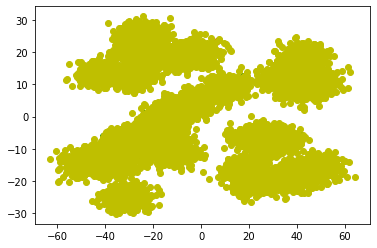

In [16]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

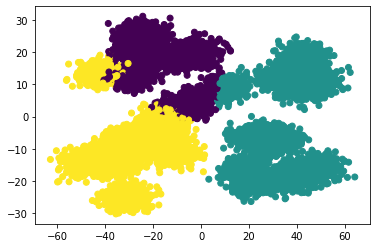

In [17]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

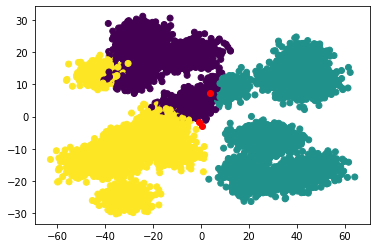

In [18]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) # cluster center
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

SSE

In [19]:
kmeans.inertia_ #ทำการหาค่า Sum of Squared Errors

11348589.29093799

In [20]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)
    #ทำการวนรูปข้อมูลเพื่อจะเปลี่ยน k จาก 1 ให้เป็นค่าดังต่อไปนี้ คือ 2,3,4,5,6,7และ 8

In [21]:
SSE
#เมื่อทำการรันข้อมูลแล้วจะมีข้อมูลออกมาทั้งหมด 8 ตัวด้วยกัน

[20753125.440506306,
 12770766.433320392,
 11348589.29093799,
 10319567.889919927,
 9451413.005473346,
 8807771.243344527,
 8262246.262440401,
 7730810.008455613]

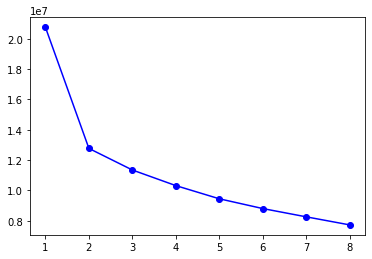

In [22]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
#เอาค่า SSE ที่คำนวณได้ มา เพื่อที่จะได้ทำการ plot graph ของข้อมูล

###silhouette coefficient
Silhouette เป็นเทคนิคที่ใช้วัดว่า Instance นั้นมีความเหมือนกับ Cluster ที่มันอยู่มากเพียงใด เมื่อเทียบกับ Cluster อื่นๆ ค่าของ Silhouette อยู่ในช่วง -1 ถึง 1 ยิ่งมีค่ามากแสดงว่า Instance มีความคล้ายกับ cluster ของมันมากและมีความคล้ายกับ Cluster อื่นน้อย Silhouette สามารถใช้ Distance metric อย่างเช่น Euclidean, Manhattan distance มาช่วยเพื่อวัดระยะ

In [23]:
from sklearn import metrics

In [24]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)
#การทำ Silhouette Scores ต้องคิดข้อมูลหลายๆกลุ่ม จะคิดแค่กลุ่มเดียวไม่ได้

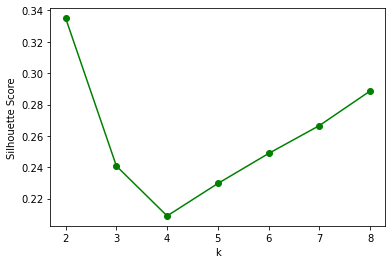

In [25]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');
#ถ้าดูจากจุดกราฟของ Silhouette Scores ที่สูงที่สุด 
#ถ้ามีค่ามากแสดงว่าใกล้กันมาก และจะมีค่าตั้งแต่-1ถึง 1

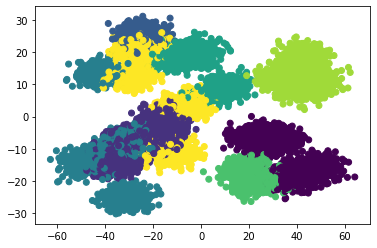

In [26]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

##3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

In [27]:
from sklearn.manifold import MDS

In [28]:
mds = MDS(n_components=2)
#กำหนดว่าเราจะใช้ components ของ mds เป็น 2

In [32]:
new_mds = mds.fit_transform(Data)

##K-mean

In [33]:
kmeans2= KMeans(n_clusters=8,random_state=2021)  
#ให้ k= 8 ตามที่หาไว้
kmeans2.fit(Data)
g = kmeans2.predict(Data)
#กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น g

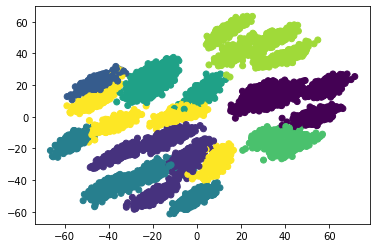

In [36]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_mds[:,0],new_mds[:,1],c=y)

##4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

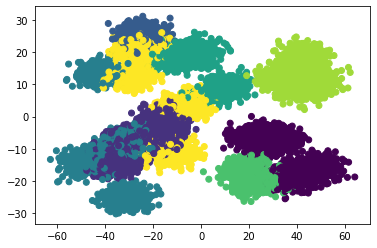

In [37]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

##กราฟของข้อ 3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ



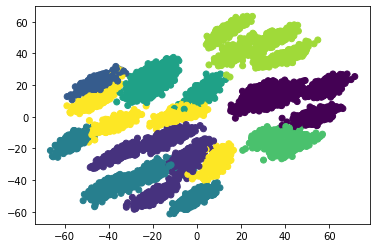

In [39]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_mds[:,0],new_mds[:,1],c=y)

จากการเปรียบเทียบการทำ clustering และ visualize ข้อมูลแบบ 2 มิติ ข้อ 2 กับ ข้อ3 แล้ว ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering และ visualize ข้อมูลแบบ 2 มิติ จะลด dimension ก่อน แล้วค่อยทำ clustering จะเห็นว่ากราฟข้อ 3 มีการกระจายข้อมูลที่เปลี่ยนไป และลักษณะการกระจายข้อมูลเล็กลง เนื่องจาก มี dimension ลดลง และ ระยะห่างยังคงเดิม แต่ ข้อ 2 การกระจายของข้อมูลมีขนาดใหญ่ เนื่องจาก ไม่มีการลด dimension 